# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Training Data

In [2]:
# reading the data
cols = ['ID', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'class']
df = pd.read_csv("data/train_data.txt", names=cols, index_col="ID")
print(df.shape)
df.head()

(338, 12)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,class
ID,,,,,,,,,,,,
0,0.521037,0.022658,0.545989,0.364042,0.680010,0.792037,0.703140,0.731113,0.668446,0.605518,0.355260,1
1,0.643144,0.272574,0.615783,0.502017,0.270471,0.181768,0.203608,0.348757,0.344367,0.141323,0.155274,1
2,0.601496,0.390260,0.595743,0.449798,0.572941,0.431017,0.462512,0.635686,0.481580,0.211247,0.228560,1
3,0.210090,0.360839,0.233501,0.102993,0.973233,0.811361,0.565604,0.522863,0.763481,1.000000,0.137905,1
4,0.629893,0.156578,0.630986,0.489705,0.459788,0.347893,0.463918,0.518390,0.342766,0.186816,0.232766,1


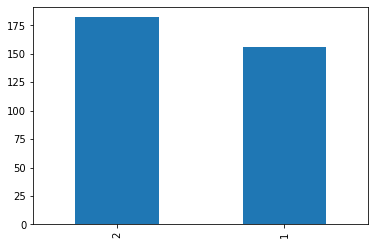

In [3]:
df['class'].value_counts().plot(kind='bar')
plt.show()

# Exploring Data

In [4]:
# helper function
import re 

def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

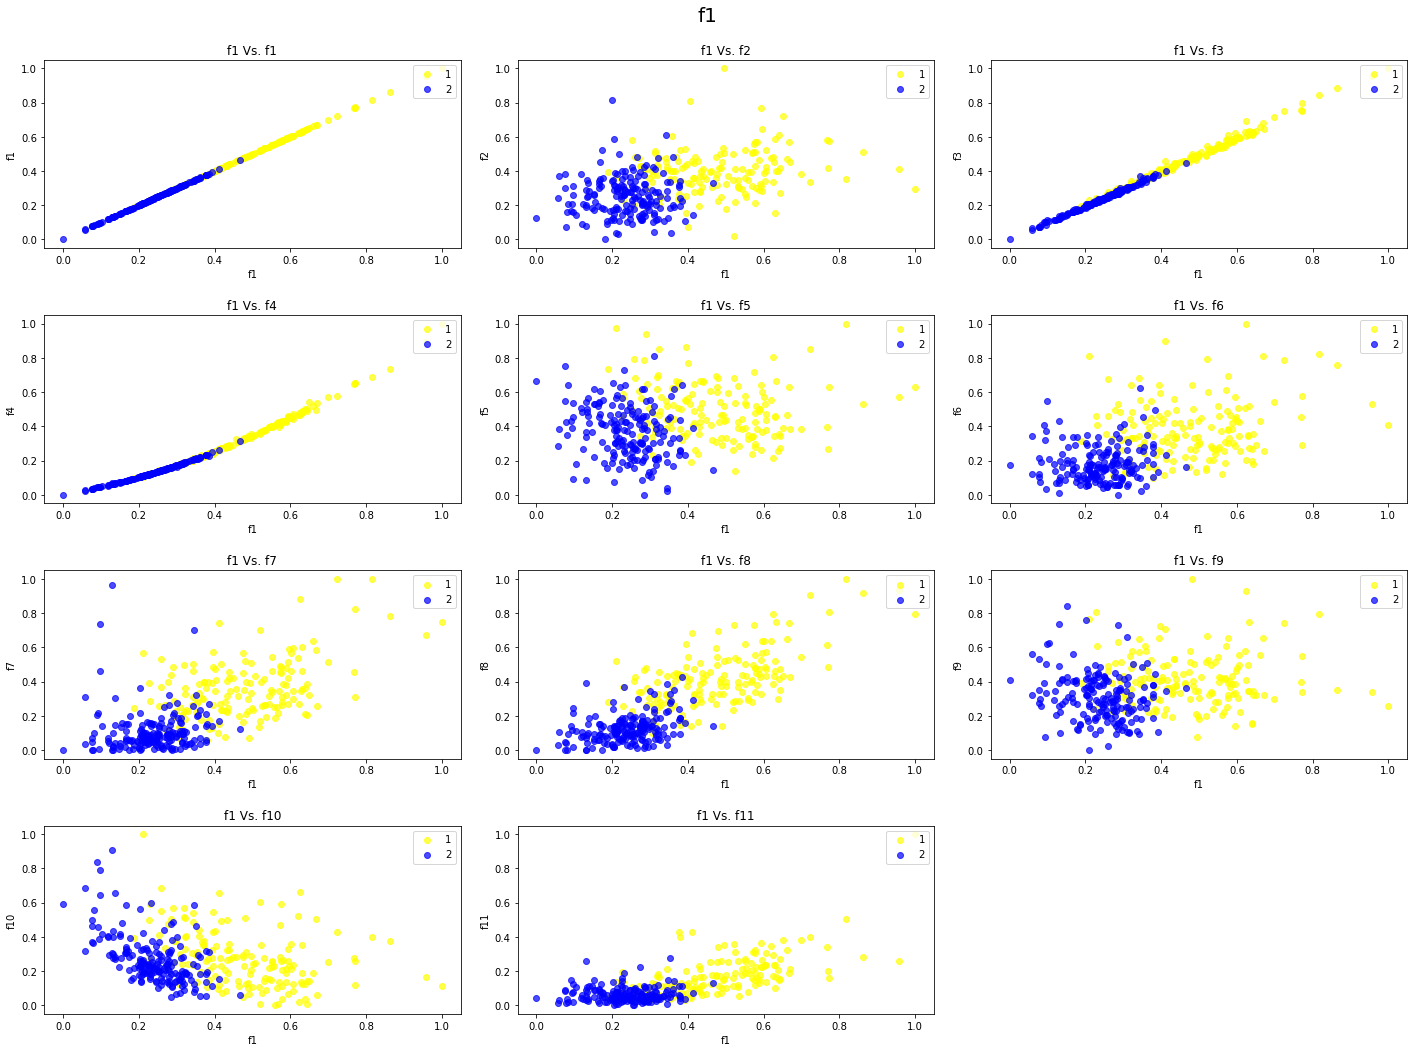

In [5]:
def feature_corr_plot(df, feature_name):
    all_columns = set(df.columns) - {"class", "ID"}
    assert feature_name in all_columns, f"{feature_name} is not found!!"
    all_columns = sorted_nicely(all_columns)
    
    plt.figure(figsize=(20,15))
    plt.suptitle(feature_name, fontsize=20)
    for i, col in enumerate(all_columns):
        plt.subplot(4,3,i+1)
        groups = df.groupby('class')
        for name, group in groups:
            plt.scatter(group[feature_name], group[col], label=name, c="yellow" if name==1 else "blue", alpha=0.7)
        plt.title(f"{feature_name} Vs. {col}")
        plt.xlabel(feature_name)
        plt.ylabel(col)
        plt.legend(loc="upper right", labels=['1','2'])
        plt.tight_layout(pad=2)

feature_corr_plot(df, "f1")

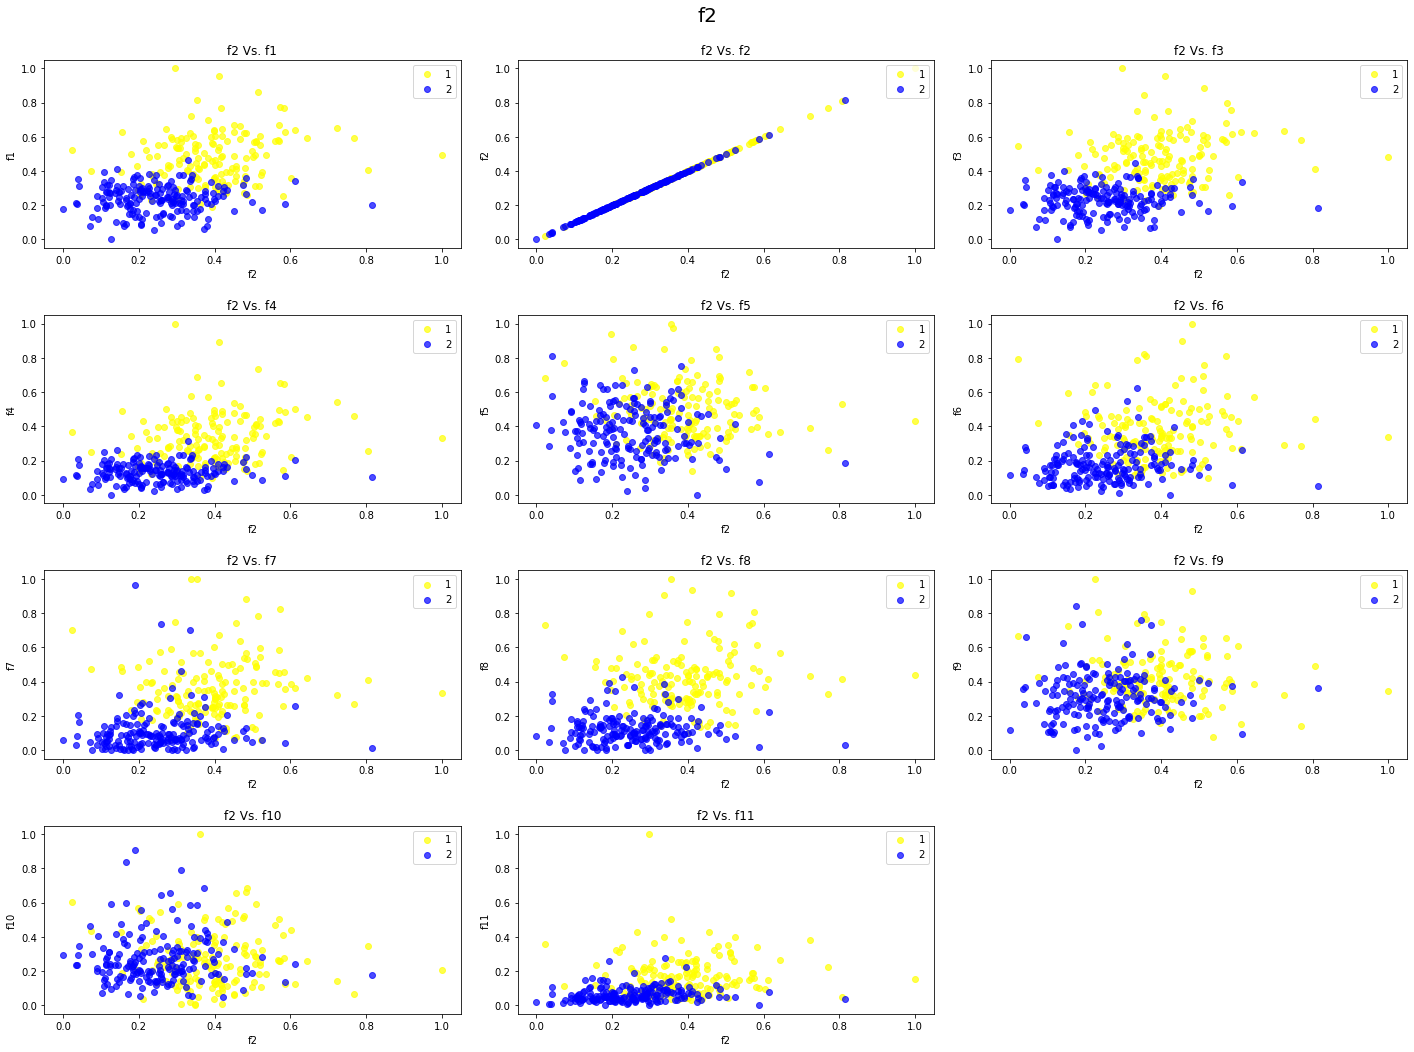

In [6]:
feature_corr_plot(df, "f2")

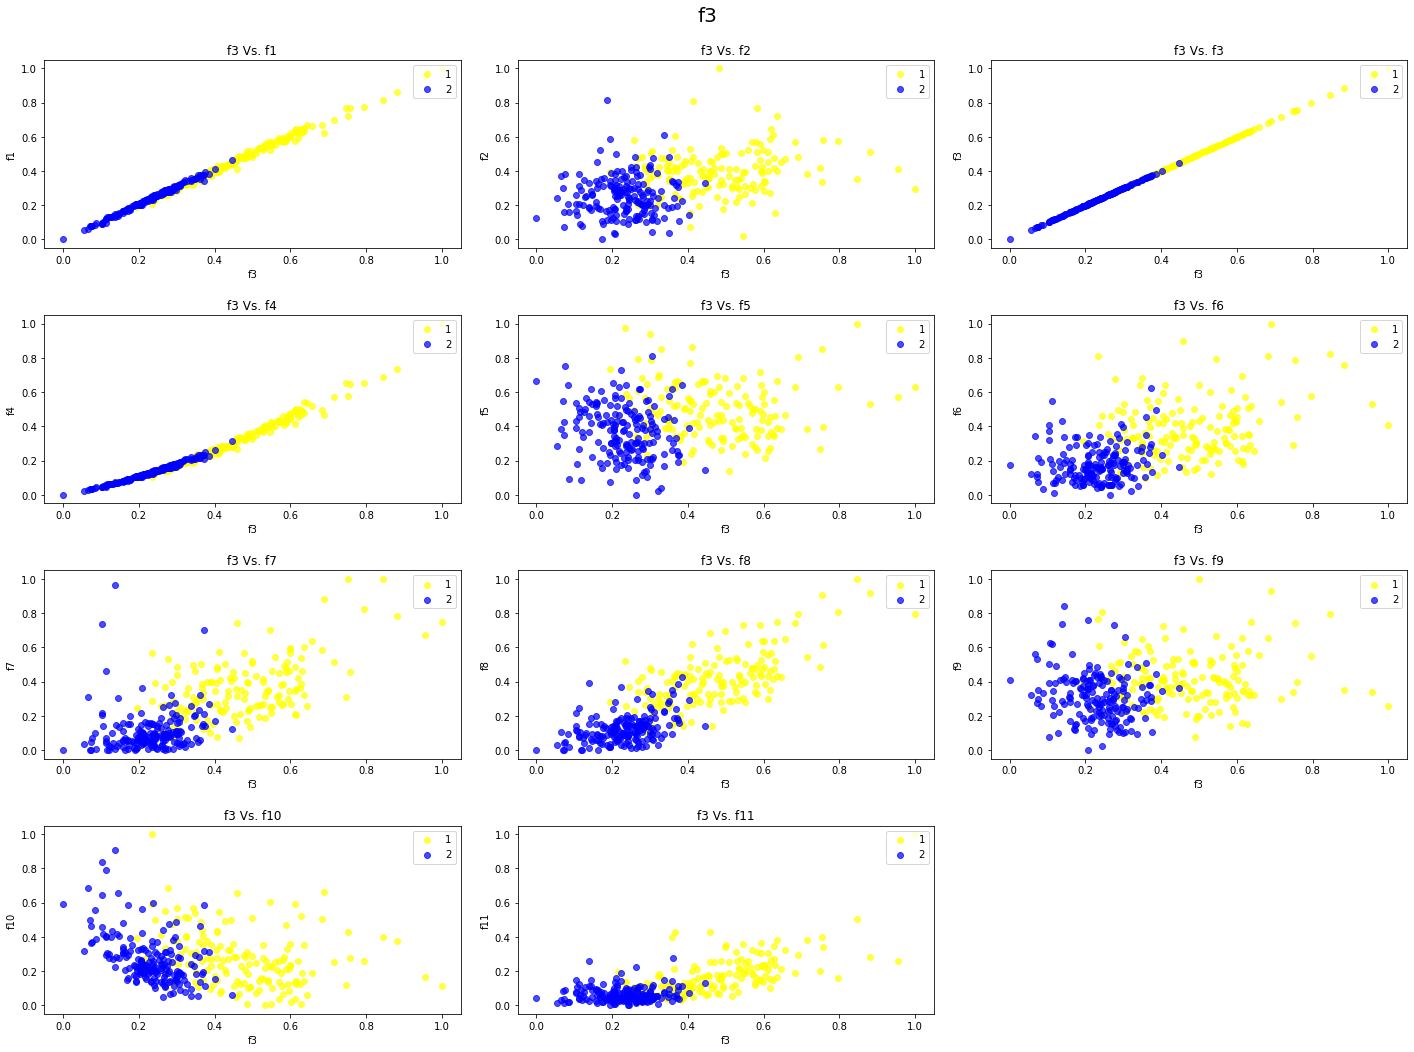

In [7]:
feature_corr_plot(df, "f3")

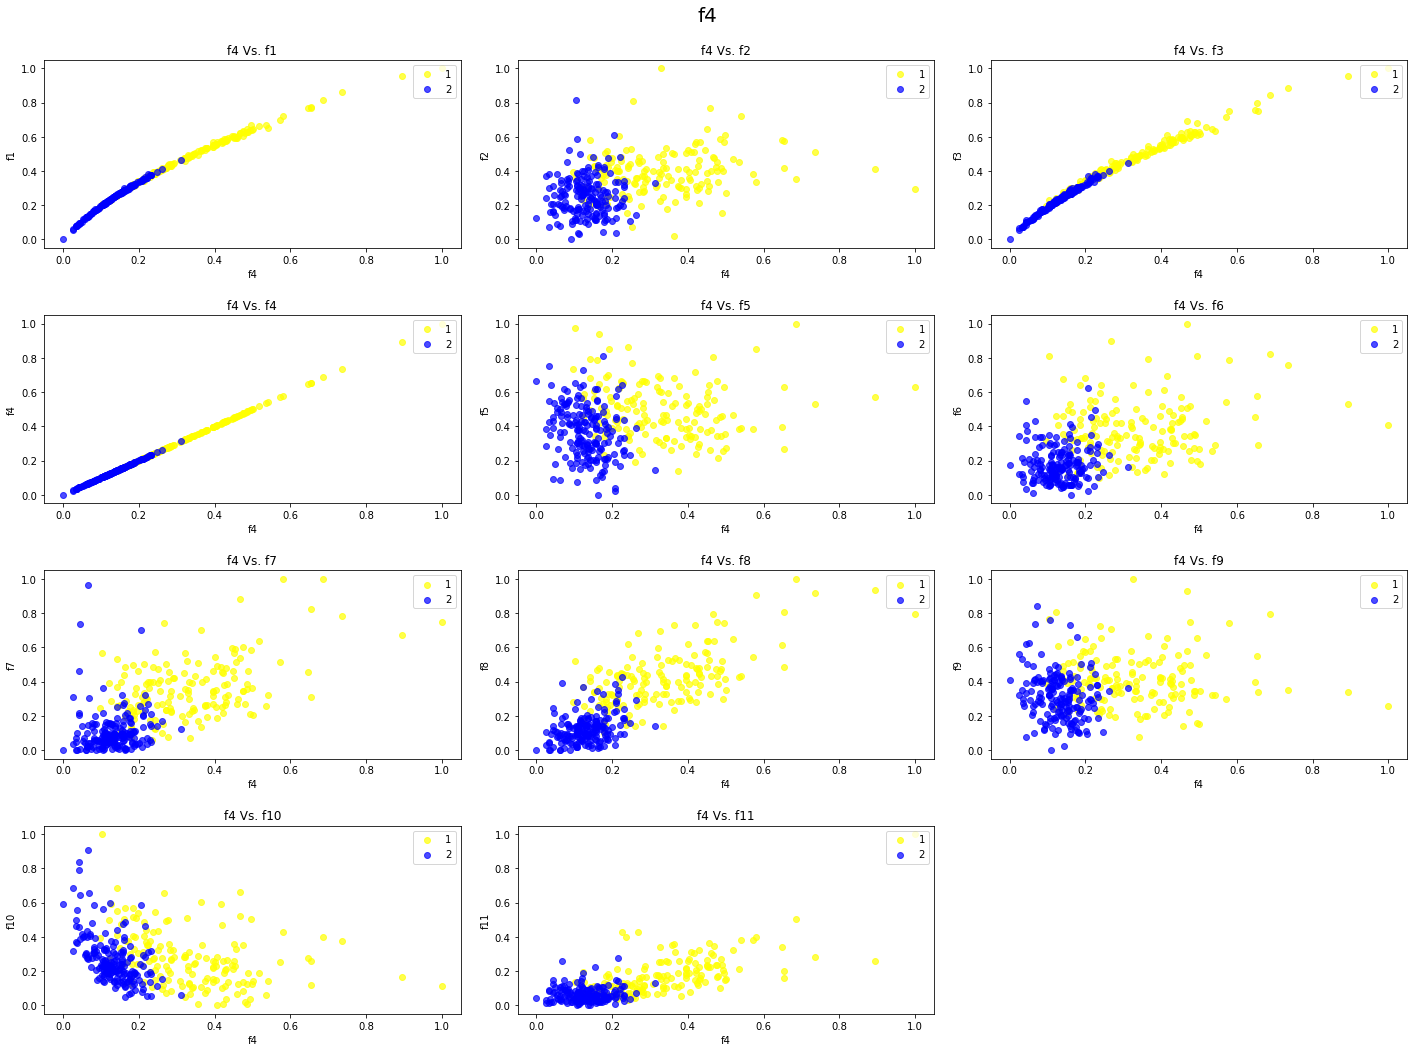

In [8]:
feature_corr_plot(df, "f4")

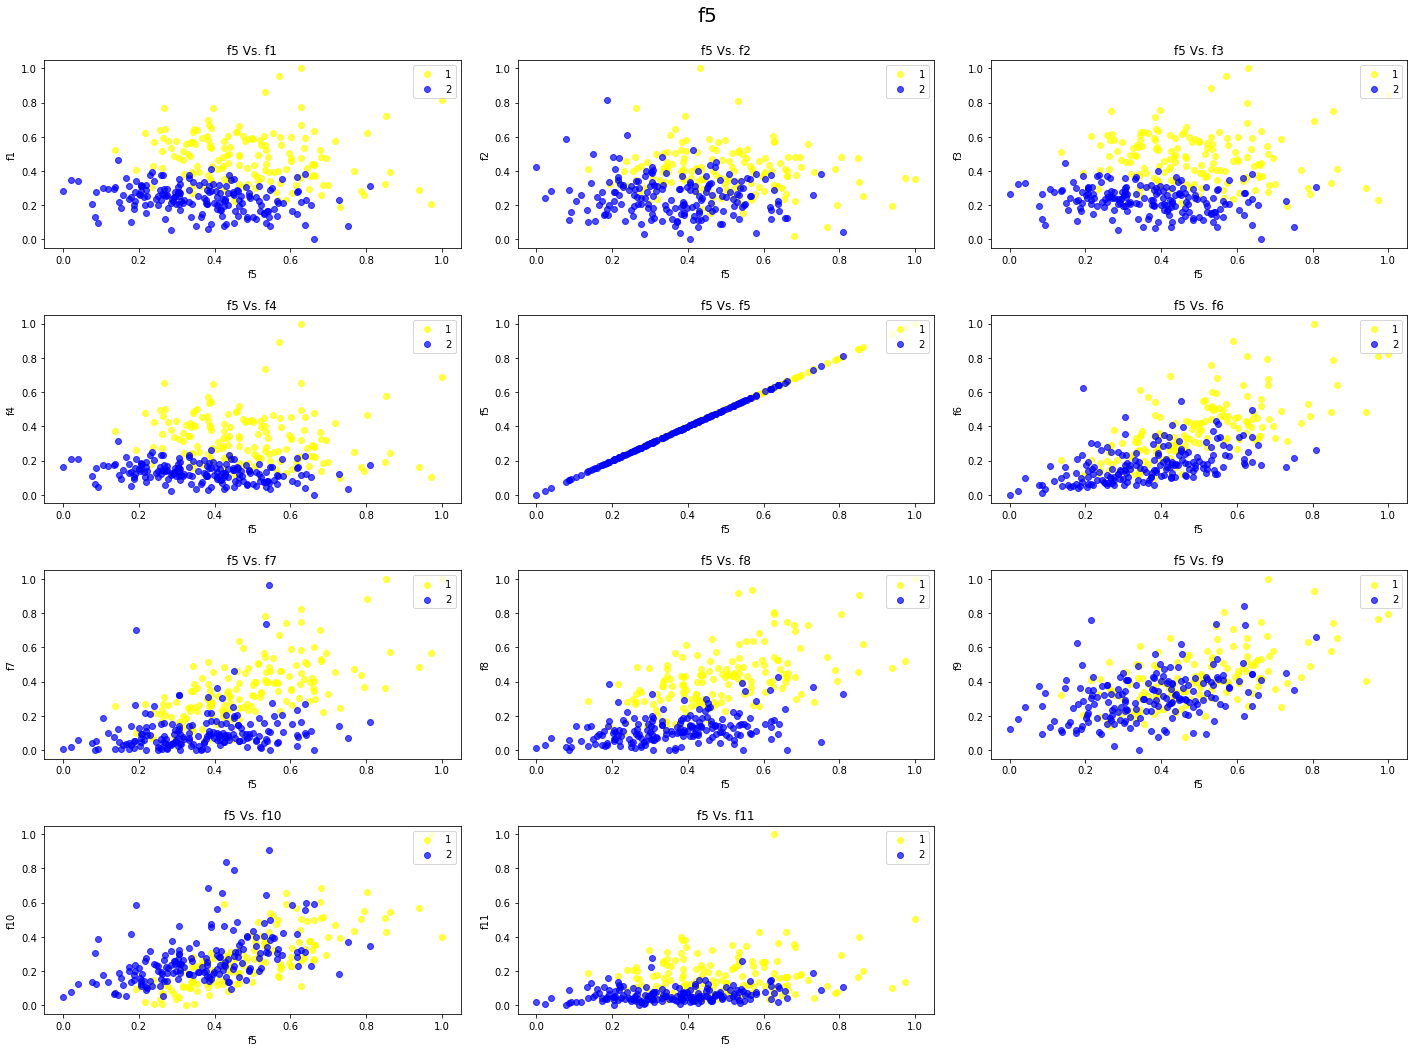

In [9]:
feature_corr_plot(df, "f5")

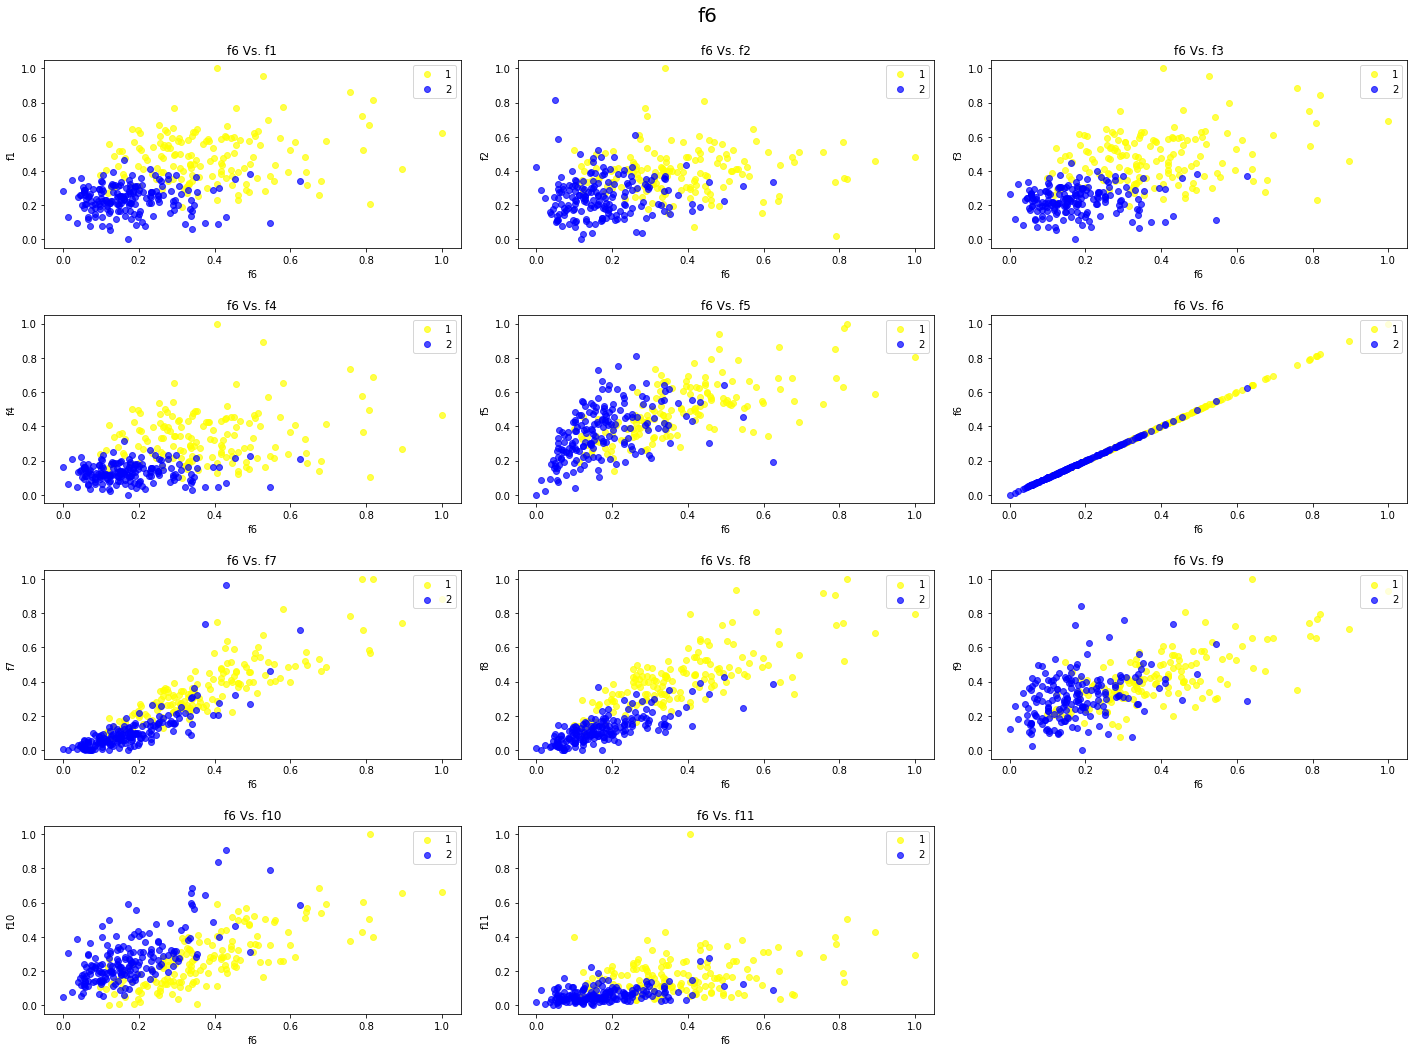

In [10]:
feature_corr_plot(df, "f6")

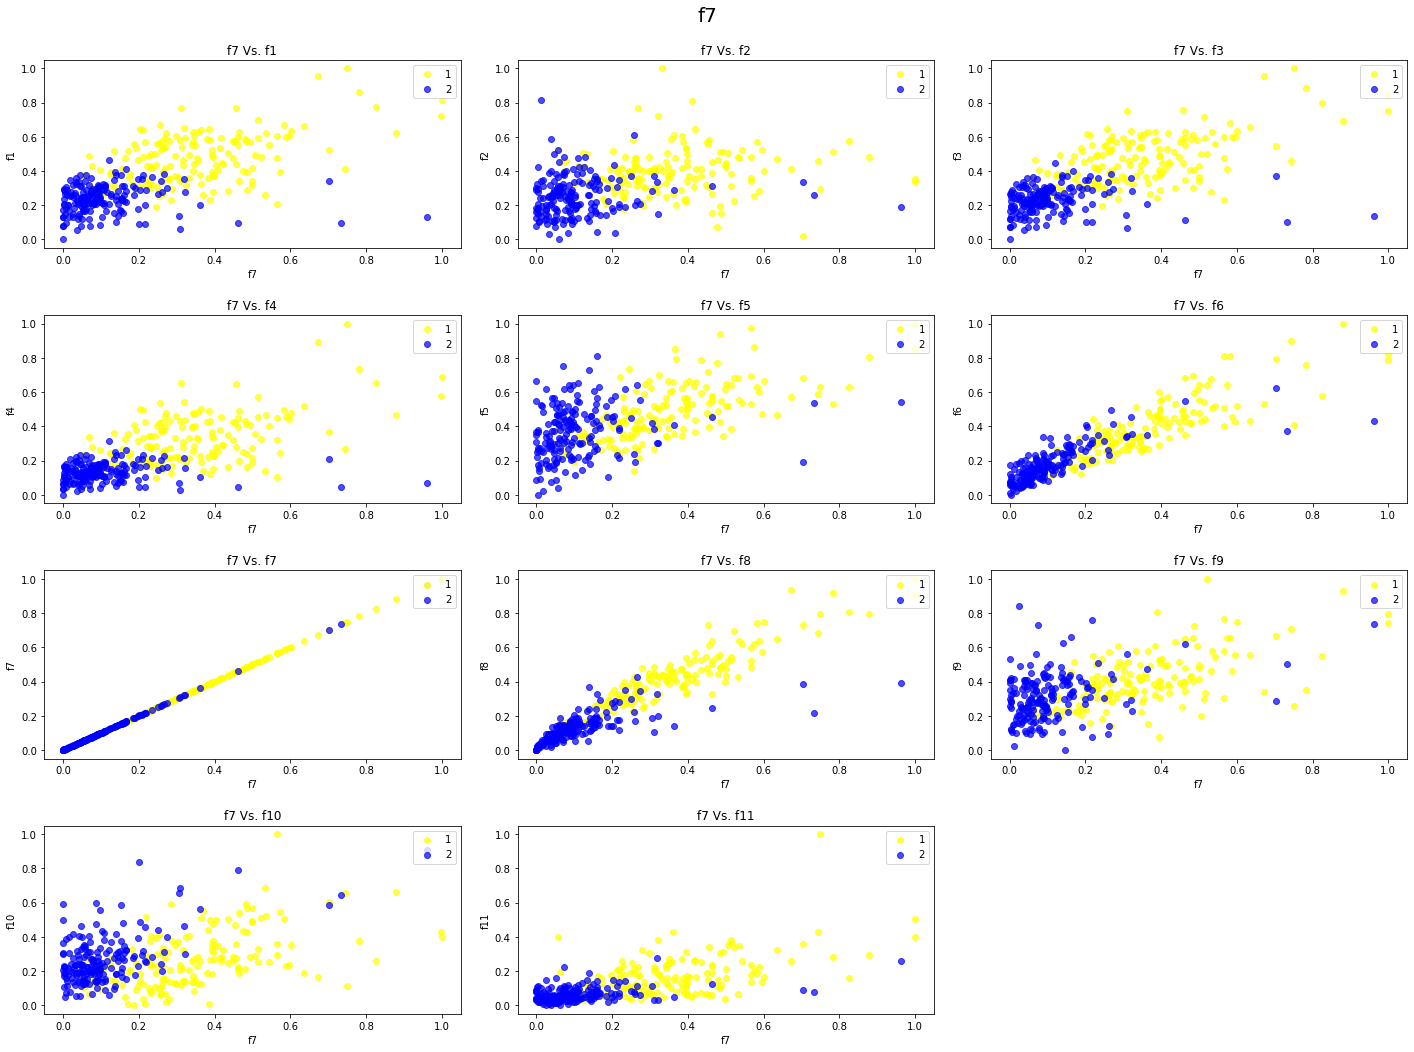

In [11]:
feature_corr_plot(df, "f7")

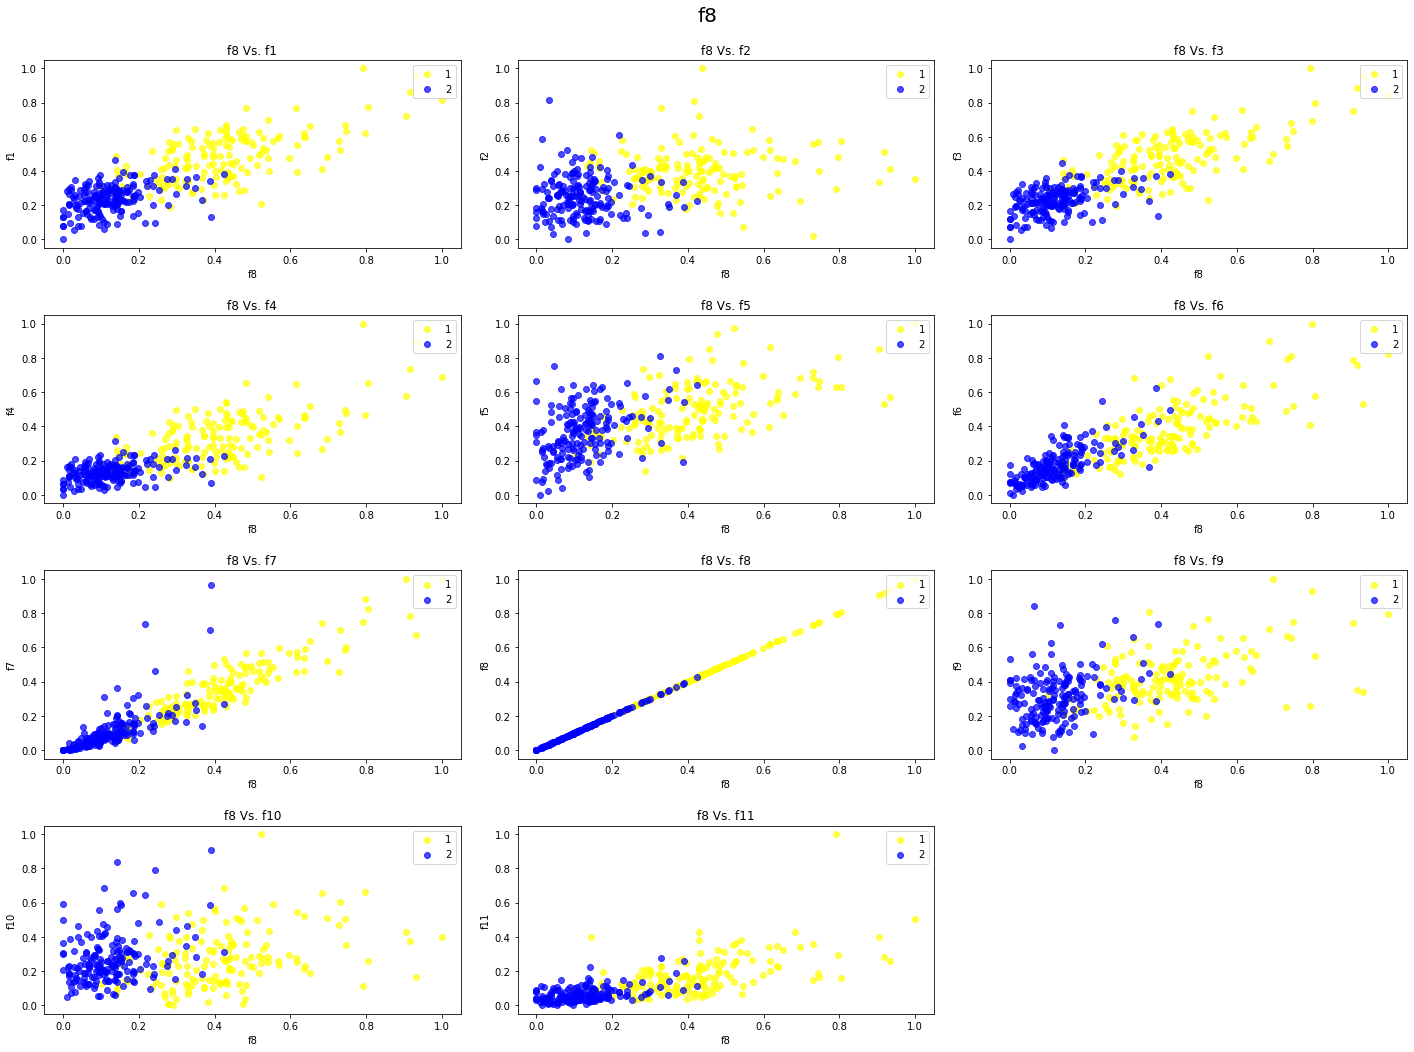

In [12]:
feature_corr_plot(df, "f8")

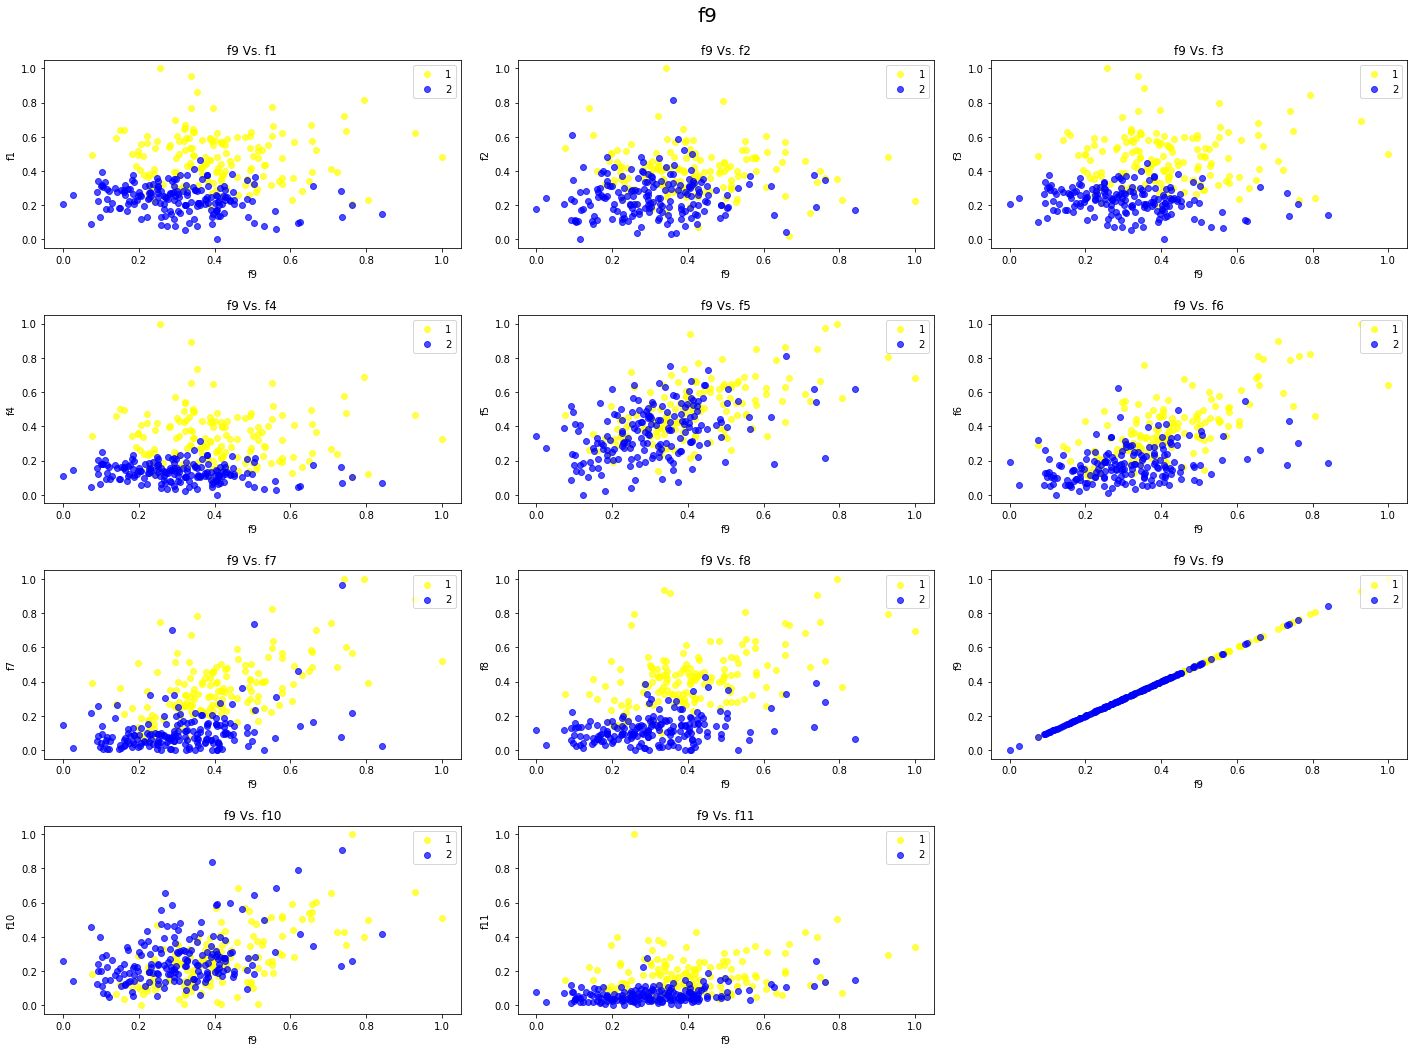

In [13]:
feature_corr_plot(df, "f9")

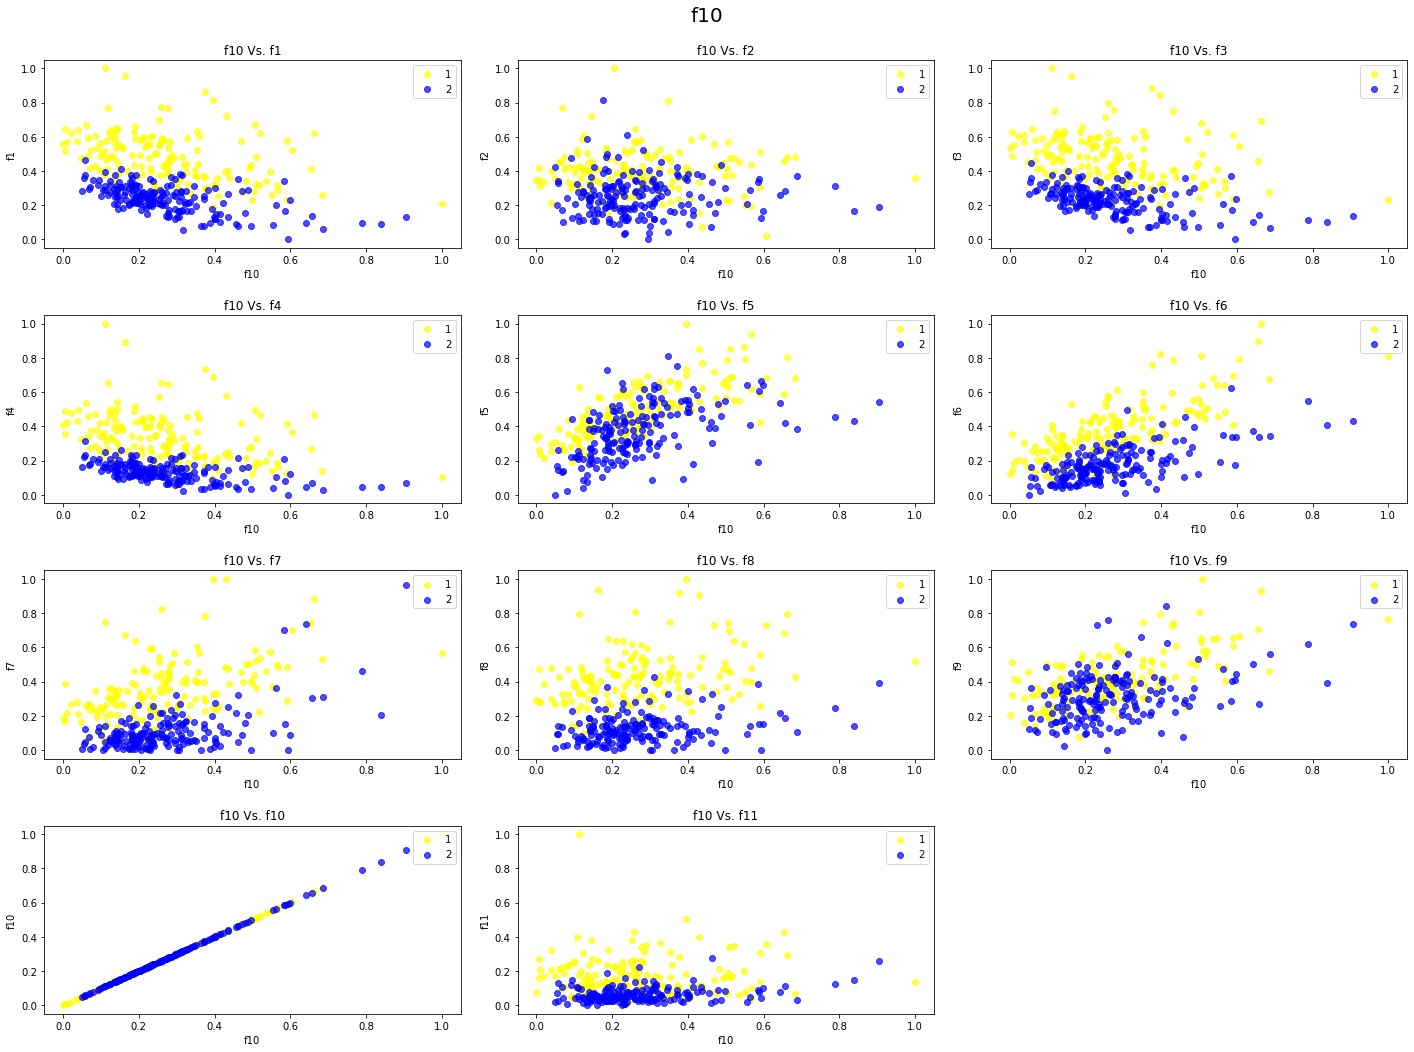

In [14]:
feature_corr_plot(df, "f10")

## Furthur Exploration

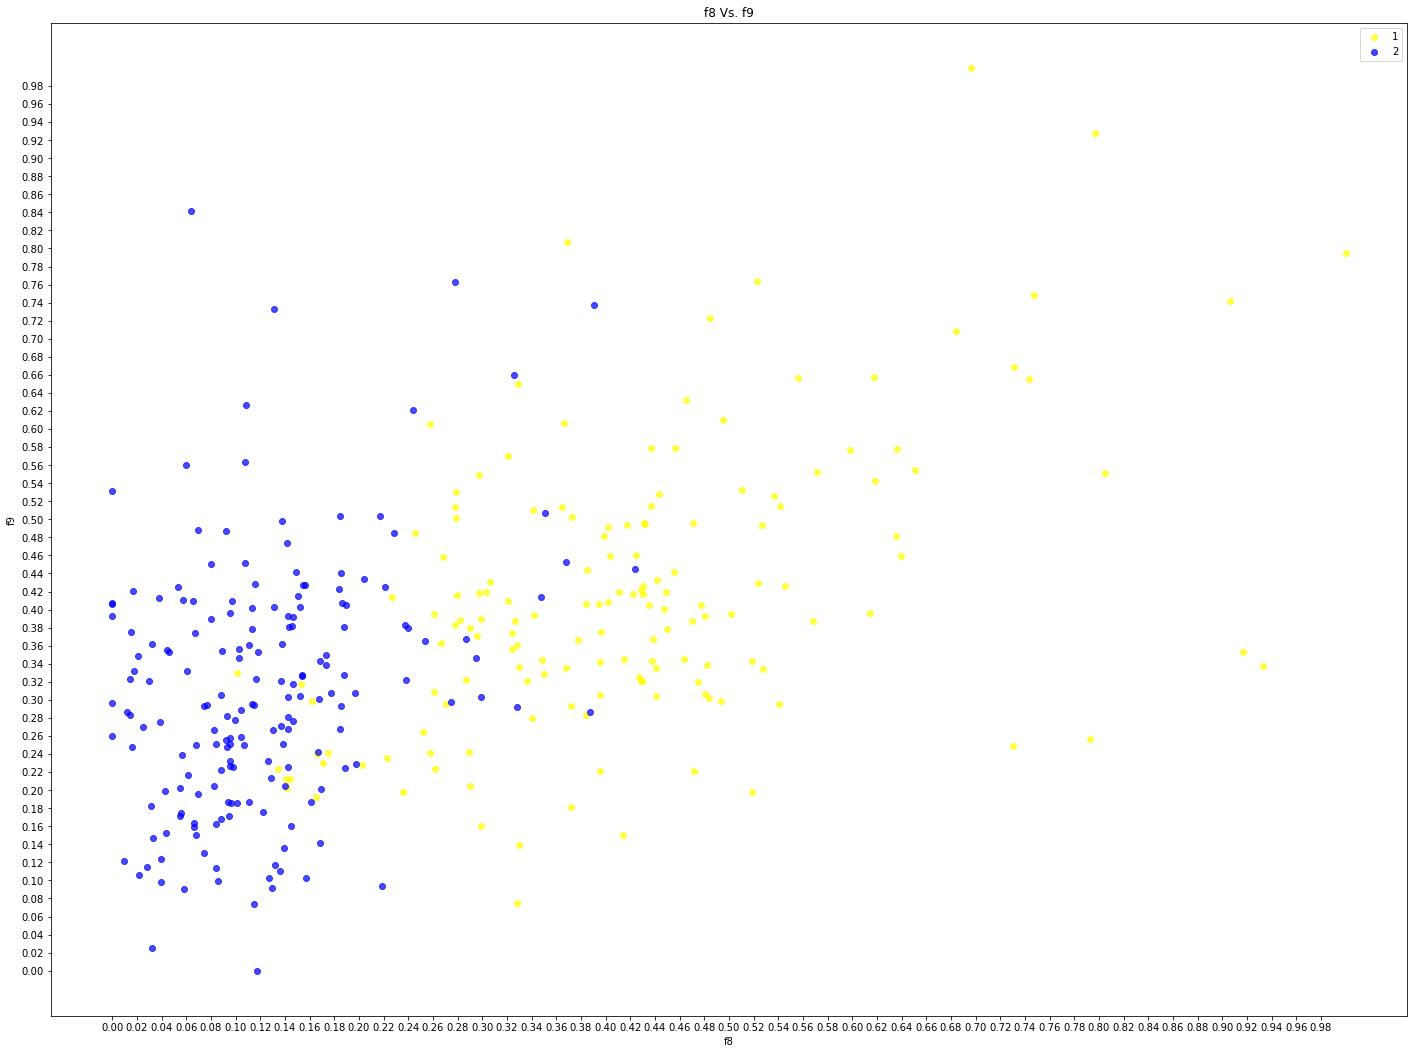

In [15]:
feature_name = "f8"
col = "f9"

plt.figure(figsize=(20,15))
groups = df.groupby('class')
for name, group in groups:
    plt.scatter(group[feature_name], group[col], label=name, c="yellow" if name==1 else "blue", alpha=0.7)
plt.title(f"{feature_name} Vs. {col}")
plt.xticks(np.arange(0,1,0.02))
plt.yticks(np.arange(0,1,0.02))
plt.xlabel(feature_name)
plt.ylabel(col)
plt.legend(loc="upper right", labels=['1','2'])
plt.tight_layout(pad=2)

